---
toc: true
comments: false
layout: default
title: Team Test 1.1-1.4 (Compiled)
courses: { csp: {week: 5} }
type: hacks
---

## Collaboration Review
>What are the benefits of a team? Explain some of the diveristies that your team has to offer.
Describe how you will facilitate communication amongst group members.
How will you hold each person accountable for their portion of the work? Think about dates, review tickets, and peer revies.

## Program Function and Purpose (Kyle Liang)
To “make” a program with function and purpose, you need to “plan” a program with function and purpose. Build a Jupyter Notebook to show examples of the following.

In [ ]:
# Program with Output

print("Hello, World!")

In [ ]:
# Program with Input and Output

name = input("What is your name?\n> ")
print(f"Hello, {name}!")

In [ ]:
# Program with a List

myFruits = ["apple", "banana", "cherry"]

def displayFruits():
    for i, fruit in enumerate(myFruits):
        print(f"{i}. {fruit}")

# Append to List
favFruit = input("What is your favorite fruit?\n> ")
if favFruit not in myFruits:
    myFruits.append(favFruit)
print(f"Great! You have {len(myFruits)}:")
displayFruits()

# Remove from List
ateFruit = input("Which fruit do you want to eat?\n> ")
if ateFruit not in myFruits:
    print("Huh? You don't have that type of fruit. You only have the following:")
else:
    print(f"Great! You ate the {ateFruit}. You now have the following fruits:")
    myFruits.remove(ateFruit)
displayFruits()

# Pop from List
print(f"Oops! The {myFruits[-1]} fell of the table. You now have these fruits:")
myFruits.pop()
displayFruits()

In [ ]:
# Program with a Dictionary

myFruits = ["apple", "banana", "cherry"]
people = ["Trevor", "Jason", "Ian"]

name = input("What's your name?\n> ")
people.append(name)
fruit = input("What's your favorite fruit?\n> ")
myFruits.append(fruit)
favFruits = dict()

def displayFruits():
    for person in favFruits.keys():
        print(f"{person} has a {favFruits[person]}")

# Creating a Dictionary from two lists (key-value pairs)
for person, fruit in zip(people, myFruits):
    favFruits[person] = fruit

# Editing a Key's Value
fruit = input(f"What! You don't like {favFruits[name]}. What is your real favorite fruit?\n> ")
favFruits[name] = fruit

# Appending to a Dictionary
teacher = input("Who is your CS teacher?\n> ")
fruit = input("What is there favorite fruit?\n> ")
favFruits[teacher] = fruit
print("Bruh...")
displayFruits()

# Removing from a Dictionary
flag = input(f"Do you like {teacher}? (YES/NO)\n> ")
if (flag == "NO"):
    favFruits.pop(teacher)
print("Bruh..................................")
displayFruits()

In [ ]:
# Programming with Iteration

# Prime Factorization
# https://www.geeksforgeeks.org/sieve-of-eratosthenes/
def primeFactors(x):
    factors = []
    for i in range(2, x): # For-Loop
        while x % i == 0: # While-Loop
            factors.append(str(i))
            x /= i
    if (x > 1):
            factors.append(x)
    return factors

# Recursive Function to find Factorial
# https://www.geeksforgeeks.org/python-program-for-factorial-of-a-number/
def factorial(x):
    if (x <= 1):
        return 1
    return x*factorial(x-1) # Recursion

num = input("Enter a non-negative number (between 2 and 100 inclusive)\n> ")
if num.isnumeric():
    num = max(int(num) % 100, 2)
    print(f"Your number is {num}")
    print(f"The prime factors are: {' '.join(primeFactors(num))}")
    print(f"{num}! is: {factorial(num)}")


In [ ]:
# Program with a Function to perform mathematical and/or a statistical calculations

def sqrt(x):
    return x**0.5

# Manhattan Distance
# https://www.geeksforgeeks.org/calculate-the-manhattan-distance-between-two-cells-of-given-2d-array/
def manhattanDist(x1, y1, x2, y2):
    return abs(x1-x2)+abs(y1-y2)

# Euclidean Distance
# https://www.geeksforgeeks.org/program-calculate-distance-two-points/
def euclideanDist(x1, y1, x2, y2):
    return sqrt((x1-x2)**2+(y1-y2)**2)

points = [
    (0, 0, 3, 4),
    (0, 0, 1, 1),
    (0, 0, 5, 12),
    (2, 3, 5, 8),
    (3, 1, 4, 1)
]

for x1, y1, x2, y2 in points:
    print(f"The Manhattan Distance between ({x1}, {y1}) and ({x2}, {y2}) is: {manhattanDist(x1, y1, x2, y2)}")
    print(f"The Euclidean Distance between ({x1}, {y1}) and ({x2}, {y2}) is: {euclideanDist(x1, y1, x2, y2)}")
    print()
    

In [ ]:
# Program with a Selection/Condition

from random import randint

num = -1
ans = randint(1, 101)
cnt = 0
while num != ans:
    num = input("Guess a number between 1 and 100 (inclusive)\n> ")
    if not num.isnumeric():
        print("Error: That's not a number... bruh...")
        break
    num = int(num)
    cnt += 1
    if num < ans:
        print("Your guess is too low!\n")
    elif num > ans:
        print("Your guess is too high!\n")
    else:
        print(f"Correct! {num} is the right answer! It took you {cnt} tries to guess correctly!\n")


## Program Design and Development (Ian Wu, Kyle Liang)
Share a program that you have expanded upon that was written by another. Show extensive documentation on that program (ie use ChatGPT for help). Here are some minimum requirements for Design and Development documentation.

Create a Visual Illustration of a program, algorithm, ot process.

### Show documentation of a program with a List and Iteration (Ian Wu)

For the city guesser game, I used images that a twitter bot had posted. However, doing this was not efficient, and the images were cropped exactly to the city borders, making some of them ugly and difficult to look at (I'm looking at you, Buckeye).

The existing twitter bot code can be found here: https://github.com/blu3r4d0n/places-bot

In [ ]:
# This imports various libraries that will be used to download images
import geopandas as gpd
import us

import rasterio
import rasterio.mask
from xyzservices import TileProvider
from requests.exceptions import HTTPError

# Reads SHP file with data on cities
df = gpd.read_file("US_place_2020.shp")  
# Converts geometries to a new coordinate system
# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.to_crs.html
df=df.to_crs(epsg=3857)

import contextily as ctx

In [ ]:
# Get the most extreme points in each direction based on city boundaries
west, south, east, north = bbox = df.iloc[0].geometry.bounds
# Save shapes to array
shapes=[df.geometry.iloc[0]]
# Store image in img variable, get image from Google Satellite
# https://contextily.readthedocs.io/en/latest/reference.html
try:
	img, ext = ctx.bounds2raster(west,south,east,north,"output.tif",zoom='auto',source=TileProvider.from_qms("Google Satellite")) #try with auto zoom level
except HTTPError:
        img, ext = ctx.bounds2raster(west,south,east,north,"output.tif",zoom=15,source=TileProvider.from_qms("Google Satellite")) #if that doesn't work try with 15, if this fails the program will crash
with rasterio.open("output.tif") as src:
	# Masks image based on coordinates from shapes array
	out_image, out_transform = rasterio.mask.mask(src,shapes,crop=True)  #mask the input iamge to polygon bounds 
	out_meta=src.meta


out_meta.update({"driver": "GTiff","height": out_image.shape[1],"width": out_image.shape[2],"transform": out_transform}) #update the metadata of image

# Save image to TIF file
with rasterio.open("masked.tif", "w", **out_meta) as dest:
	dest.write(out_image)

In [ ]:
import tweepy
from secrets import *
# Set twitter access tokens, confirms the account that the program will post on
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

res = api.media_upload(filename)

media_id = res.media_id

# Post Image in post to twitter
api.create_media_metadata(media_id,f"An aerial image of {name}, {state} surrounded by white.")
api.update_status(status=f'GEOID {geoid} {name}, {state}',media_ids=[media_id])


#delete this row and save to shapefile
df=gpd.read_file("US_place_2020.shp")
df = df.iloc[1:]
df.to_file("US_place_2020.shp")

This code was very nice, and helped me a lot with downloading the files, as I could not have made this myself. However, it didn't do exactly what I wanted to do. 

- It posted the image to twitter, I needed it to save it to a folder with a specific name
- The code used a shapefile and other data files only obtainable from a website which you needed to enter a research purpose and other info I didn't have
- The program cropped the image to the exact boundaries of a city, I needed it to be a bounding box
- The program only saved one image, I cannot sit there and run the program several thousand times

The first of the issues was relatively simple to fix, I just removed the section of code that posts the image to twitter, and then saved the file to a folder instead of as image.jpg. Code is below

In [ ]:
    bg.paste(im, offset, im)
    size = 1980, 1080
    bg.thumbnail(size, Image.LANCZOS)
## Using California Shapefile, save to a folder called cities
## Name image name of city, followed by an underscore and two-letter abbreviation for california
    bg.save("cities/" + name + "_CA.jpg")
## Log to terminal where program left off
    print('Index: ' + str(index) + ', City: ' + name + " saved.")

The next issue was less of a code issue, and more of an access issue. I managed to eventually find the census website with shapefiles and other related data for all states at the following link:
https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=Places

    The third issue took by far the longest to resolve, mainly because I overthought it and was looking in the wrong places. My first thought was the look at all the possible options for the rasterio.mask.mask function, which I found here: https://rasterio.readthedocs.io/en/latest/api/rasterio.mask.html
However, many of the descriptions were to a degree confusing, and after trying several of them, I realized all of them cropped the cities to the exact boundary anyways.

    The second idea I had was to save the img variable directly to an output.tif file. However, I quickly realized that the ctx.bounds2raster and rasterio.mask.mask
functions did not output the same type of image, and the program would give an error.

    Then, I looked through documentation for some of these libraries and found the ctx.bounds2img function, which I hoped would successfully download the image, but
again gave an error. Looking back, I realize now this is likely because of the code that was converting the tif file to a jpg, whereas this command may have already saved the image as a jpg file. But, I quickly realized that the original output.tif file had a perfectly cropped image, and I didn't need to do any more work to get that image to masked.tif, and simply replaced the masked.tif references in the rest of the program with output.tif and commented out the code cropping the image file to exact boundaries.

The last issue was easier to resolve, thankfully, and I simply added a for loop to repeat. The modified code is below:
The program was ran locally on my computer, so output is not shown, but the modified program is also an example of lists and iteration, and the citynames and data are stored in df, and they are iterated through in the for loop in the line 'for index, row in df.iterrows():' until every single file is downloaded.

In [ ]:
import geopandas as gpd
import us

import rasterio
import rasterio.mask
from xyzservices import TileProvider
from requests.exceptions import HTTPError
from PIL import Image
import contextily as ctx

# Read the GeoDataFrame
df = gpd.read_file("tl_2022_08_place.shp")
df = df.to_crs(epsg=3857)

start = -1

for index, row in df.iterrows():
    if index < start:
        continue

    west, south, east, north = row.geometry.bounds
    shapes = [row.geometry]
    try:
        img, ext = ctx.bounds2raster(west, south, east, north, "output.tif", zoom='auto', source=TileProvider.from_qms("Google Satellite")) #try with auto zoom level
    except HTTPError:
        img, ext = ctx.bounds2raster(west, south, east, north, "output.tif", zoom=15, source=TileProvider.from_qms("Google Satellite")) #if that doesn't work try with 15, if this fails the program will crash
    # with rasterio.open("output.tif") as src:
        # out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True, filled=False)  #mask the input image to polygon bounds
        # out_meta = src.meta

    # out_meta.update({"driver": "GTiff", "height": img.shape[1], "width": img.shape[2], "transform": ext}) #update the metadata

    #with rasterio.open("masked.tif", "w") as dest:
    #    dest.write(img)


    # Get info for place
    name = row.NAME
    geoid = row.GEOID
    statefp = row.STATEFP
    state = us.states.lookup(statefp).name

    # Save the image as a JPG
    # im = Image.open("masked.tif")
    im = Image.open("output.tif")
    bg = Image.new("RGB", tuple([int(round(.05*x+x)) for x in im.size]), (255, 255, 255))
    img_w, img_h = im.size
    bg_w, bg_h = bg.size
    offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)

    bg.paste(im, offset, im)
    size = 1980, 1080
    bg.thumbnail(size, Image.LANCZOS)
    bg.save("cities/" + name + "_CO.jpg")
    print('Index: ' + str(index) + ', City: ' + name + " saved.")

# Save the modified GeoDataFrame to a new shapefile
df.to_file("tl_2022_08_place.shp")


### Show comments on a program that does a mathematical and/or statistical calculation (Kyle Liang)

**Approximating π**

With help from ChatGPT. See here for more information on the logic behind this code: https://www.geeksforgeeks.org/estimating-value-pi-using-monte-carlo/

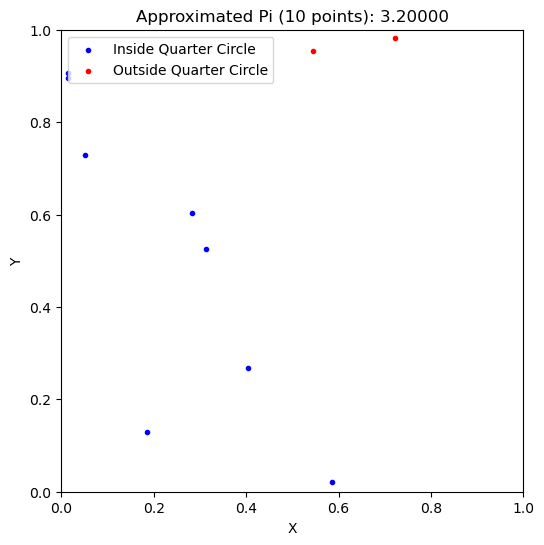

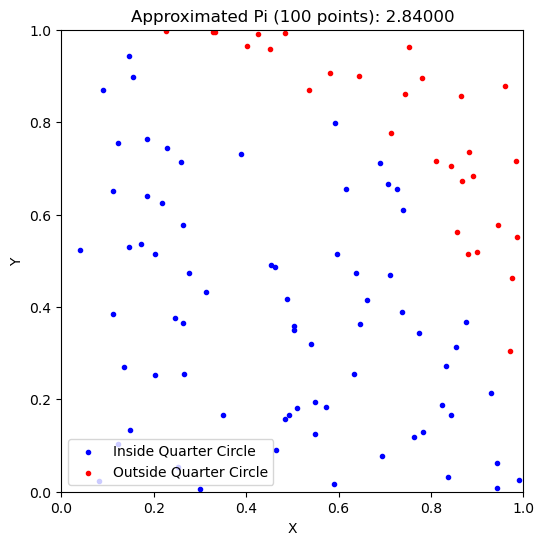

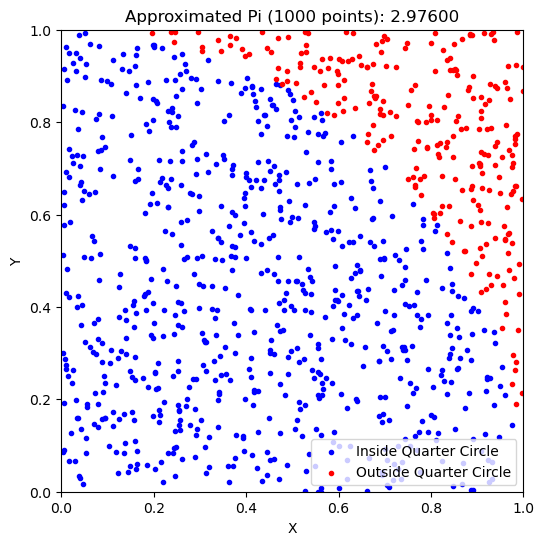

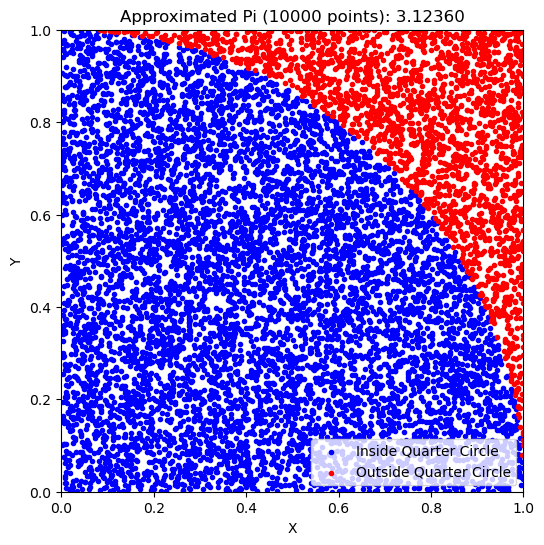

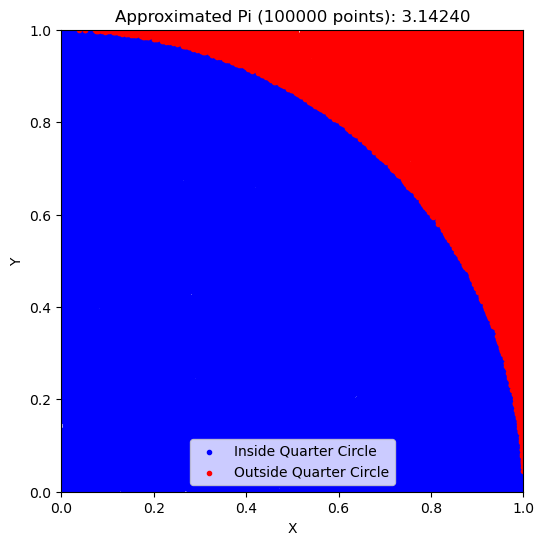

C:\Users\liang\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


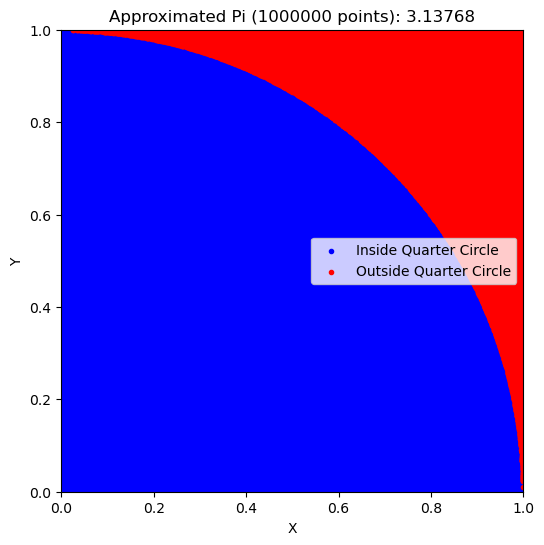

In [1]:
# pip install random
# pip install matplotlib

import random
import matplotlib.pyplot as plt

# Number of points to generate for the simulations
num_points_list = [10, 100, 1000, 10000, 100000, 1000000]

for num_points in num_points_list:
    # Initialize counters to keep track of points inside the quarter circle
    inside_circle = 0
    total_points = 0

    # Lists to store x and y coordinates for visualization
    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    # Generate random points and check if they are inside the quarter circle
    for _ in range(num_points):
        # Generate random x and y coordinates within the unit square [0, 1] x [0, 1]
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)

        # Calculate the distance from the origin (0, 0)
        distance = x**2 + y**2

        # Check if the point is inside the quarter circle
        if distance <= 1:
            inside_circle += 1
            x_inside.append(x)  # Store x coordinate for visualization
            y_inside.append(y)  # Store y coordinate for visualization
        else:
            x_outside.append(x)  # Store x coordinate for visualization
            y_outside.append(y)  # Store y coordinate for visualization

    # Approximate pi using the Monte Carlo method
    pi_approximation = (inside_circle / num_points) * 4

    # Visualize the results
    plt.figure(figsize=(6, 6))
    plt.scatter(x_inside, y_inside, color='blue', marker='.', label='Inside Quarter Circle')
    plt.scatter(x_outside, y_outside, color='red', marker='.', label='Outside Quarter Circle')
    plt.title(f'Approximated Pi ({num_points} points): {pi_approximation:.5f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')  # Ensure aspect ratio is equal for proper visualization
    plt.legend()
    plt.show()

    # Print the approximated value of pi
    # print(f"Approximated Pi ({num_points} points): {pi_approximation:.5f}")


### Identyfing and Correct Errors
Often, when we develop code the initial functionality is very simple. However, when we consider invalid conditions when using our code we often increase the complexity of our code or functions.
